# Network Analysis Lab

Complete the following exercises to help solidify your understanding of network analysis.

In [1]:
import networkx as nx
import nxviz
import community
import pandas as pd

In [2]:
import pandas as pd

In [6]:
from platform import python_version
print(python_version())

3.7.3


## U.S. Mens Basketball Data Set

In the `us_mens_basketball.csv` data set, each row represents an single basketball player's participation in a single event at a single Olympics. 

In [7]:
basketball = pd.read_csv('./data/us_mens_basketball.csv')

In [8]:
basketball.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold
2,2863,Walter Ray Allen,M,25.0,192.0,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
3,3874,"William Lloyd ""Willie"" Anderson, Jr.",M,21.0,200.0,86.0,United States,USA,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Bronze
4,4505,Carmelo Kyan Anthony,M,20.0,203.0,109.0,United States,USA,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


## 1. Transform this data set into one that can be turned into a graph where the entities are represented by the Name field and the relationships are represented by whether the players played in the same Olympics together (Games field).

Sort descending by the number of pairwise interactions. Which pair of players have competed in the most Olympics together?

In [10]:
basketball2 = basketball.copy()

merge_df = pd.merge(basketball, basketball2, how='inner', on = basketball.Games)
merge_df.head()

,key_0,ID_x,Name_x,Sex_x,Age_x,Height_x,Weight_x,Team_x,NOC_x,Games_x,...,Weight_y,Team_y,NOC_y,Games_y,Year_y,Season_y,City_y,Sport_y,Event_y,Medal_y
0,2000 Summer,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,...,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1,2000 Summer,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,...,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
2,2000 Summer,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,...,109.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
3,2000 Summer,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,...,102.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
4,2000 Summer,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,...,100.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold


In [11]:
gr_df = merge_df.groupby(['Name_x','Name_y']).count().reset_index()
gr_df = gr_df[gr_df['Name_x'] != gr_df['Name_y']]
gr_df

,Name_x,Name_y,key_0,ID_x,Sex_x,Age_x,Height_x,Weight_x,Team_x,NOC_x,...,Weight_y,Team_y,NOC_y,Games_y,Year_y,Season_y,City_y,Sport_y,Event_y,Medal_y
1,Adrian Delano Dantley,"Ernest ""Ernie"" Grunfeld",1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,Adrian Delano Dantley,"Kenneth Alan ""Kenny"" Carr",1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,Adrian Delano Dantley,"Michel Taylor ""Tate"" Armstrong",1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,Adrian Delano Dantley,"Mitchell William ""Mitch"" Kupchak",1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,Adrian Delano Dantley,"Philip Jackson ""Phil"" Ford, Jr.",1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,Adrian Delano Dantley,"Phillip Gregory ""Phil"" Hubbard",1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,Adrian Delano Dantley,Scott Glenn May,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,Adrian Delano Dantley,"Steven Bernard ""Steve"" Sheppard",1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9,Adrian Delano Dantley,"Thomas Joseph ""Tom"" LaGarde",1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
10,Adrian Delano Dantley,Walter Paul Davis,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


## 2. Use the `from_pandas_edgelist` method to turn the data frame into a graph.

In [13]:
G = nx.from_pandas_edgelist(gr_df, 'Name_x' , 'Name_y')

## 3. Compute and print the following graph statistics for the graph:

- Number of nodes
- Number of edges
- Average degree
- Density

In [14]:
#number of nodes

G.order()

196

In [15]:
#number of edges

G.size()

1232

In [16]:
#number of edges

sum(dict(G.degree()).values())/G.order()

12.571428571428571

In [17]:
#density

nx.density(G)

0.06446886446886448

## 4. Compute betweenness centrality for the graph and print the top 5 nodes with the highest centrality.

In [18]:
betweenness = nx.betweenness_centrality(G, weight='edge')

sorted_betw = sorted(betweenness.items(), key=lambda kv: kv[1], reverse=True)
sorted_betw[:5]

[('Gary Dwayne Payton', 0.09193761564895586),
 ('Jason Frederick Kidd', 0.09135606661379858),
 ('Carmelo Kyan Anthony', 0.04742268041237115),
 ('David Maurice Robinson', 0.03266190853819722),
 ('William Marion "Bill" Hougland', 0.030240549828178694)]

## 5. Compute Eigenvector centrality for the graph and print the top 5 nodes with the highest centrality.

In [19]:
eigenvector = nx.eigenvector_centrality_numpy(G)
sorted_eigen = sorted(eigenvector.items(), key=lambda kv: kv[1], reverse=True)
sorted_eigen[:5]

[('Carmelo Kyan Anthony', 0.34185005667190693),
 ('LeBron Raymone James', 0.2884535214315888),
 ('Christopher Emmanuel "Chris" Paul', 0.22431681558531258),
 ('Kobe Bean Bryant', 0.2243168155853125),
 ('Deron Michael Williams', 0.22431681558531244)]

## 6. Compute degree centrality for the graph and print the top 5 nodes with the highest centrality.

In [20]:
degree = nx.degree_centrality(G)
sorted_deg = sorted(degree.items(), key=lambda kv: kv[1], reverse=True)
sorted_deg[:5]

[('Carmelo Kyan Anthony', 0.18461538461538463),
 ('David Maurice Robinson', 0.14358974358974358),
 ('Robert Albert "Bob" Kurland', 0.13333333333333333),
 ('LeBron Raymone James', 0.13333333333333333),
 ('William Marion "Bill" Hougland', 0.12307692307692308)]

## 7. Generate a network visualization for the entire graph using a Kamada-Kawai force-directed layout.

C:\Users\user\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


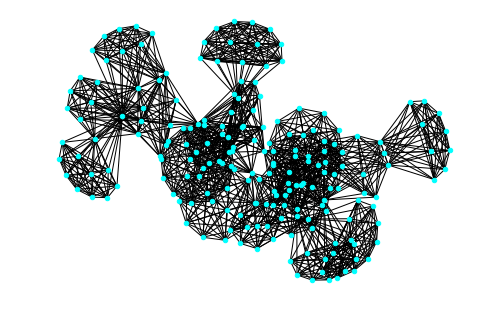

In [21]:
nx.draw_kamada_kawai(G, node_size=20, node_color='cyan')

## 8. Create and visualize an ego graph for the player with the highest betweenness centrality.

C:\Users\user\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


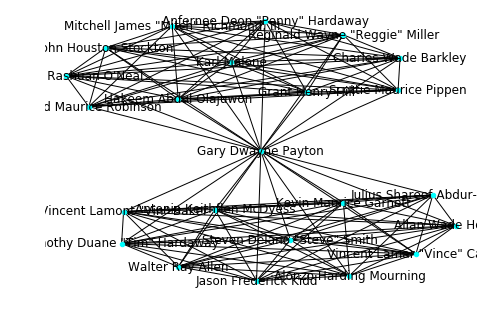

In [22]:
ego = nx.ego_graph(G, sorted_betw[:5][0][0], radius=1)
nx.draw_kamada_kawai(ego, node_size=20, node_color='cyan', with_labels=True)

## 9. Identify the communities within the entire graph and produce another visualization of it with the nodes color-coded by the community they belong to.

In [23]:
partition = community.best_partition(G)

C:\Users\user\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


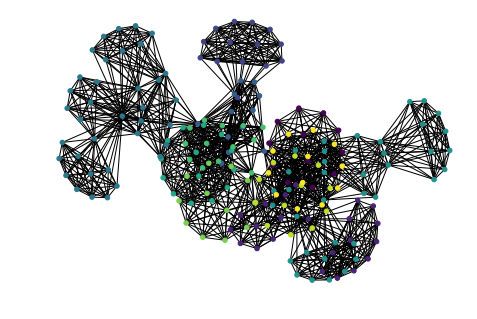

In [25]:
values = list(partition.values())
nx.draw_kamada_kawai(G, node_size=20, node_color=values)

## Bonus: Hierarchical Graphs

Thus far, we have analyzed graphs where the nodes represented individual players and the edges represented Olympic games that they have competed in together. We can analyze the data at a higher level if we wanted to, strippping out the players as entities and analyzing the data at the Games level. To do this, we would need to reconstruct the graph so that the *Games* field represents the entities and then use the player names as the edge criteria so that there would be an edge between two Olympic games if an player played in both of them. You already have the tools in your toolbox to be able to do this, so give it a try. 

### Create a graph with Games as the entities and then print out the graph statistics.

In [26]:
game_df = pd.merge(basketball, basketball2, how='inner', on = basketball.Name)
game_df.head()

,key_0,ID_x,Name_x,Sex_x,Age_x,Height_x,Weight_x,Team_x,NOC_x,Games_x,...,Weight_y,Team_y,NOC_y,Games_y,Year_y,Season_y,City_y,Sport_y,Event_y,Medal_y
0,Julius Shareef Abdur-Rahim,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,...,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1,"Stephen Todd ""Steve"" Alford",2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,...,74.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold
2,Walter Ray Allen,2863,Walter Ray Allen,M,25.0,192.0,93.0,United States,USA,2000 Summer,...,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
3,"William Lloyd ""Willie"" Anderson, Jr.",3874,"William Lloyd ""Willie"" Anderson, Jr.",M,21.0,200.0,86.0,United States,USA,1988 Summer,...,86.0,United States,USA,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Bronze
4,Carmelo Kyan Anthony,4505,Carmelo Kyan Anthony,M,20.0,203.0,109.0,United States,USA,2004 Summer,...,109.0,United States,USA,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


In [27]:
gm_df = game_df.groupby(['Games_x','Games_y']).count().reset_index()
gm_df = gm_df[gm_df['Games_x'] != gm_df['Games_y']]
gm_df

,Games_x,Games_y,key_0,ID_x,Name_x,Sex_x,Age_x,Height_x,Weight_x,Team_x,...,Height_y,Weight_y,Team_y,NOC_y,Year_y,Season_y,City_y,Sport_y,Event_y,Medal_y
2,1948 Summer,1952 Summer,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1952 Summer,1948 Summer,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,1952 Summer,1956 Summer,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,1956 Summer,1952 Summer,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,1956 Summer,1960 Summer,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9,1960 Summer,1956 Summer,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
16,1984 Summer,1992 Summer,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
18,1988 Summer,1992 Summer,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
19,1988 Summer,1996 Summer,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
20,1992 Summer,1984 Summer,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [29]:
P = nx.from_pandas_edgelist(gm_df, 'Games_x' , 'Games_y')

In [30]:
P.order()

13

In [31]:
P.size()

15

In [32]:
sum(dict(P.degree()).values())/P.order()

2.3076923076923075

In [33]:
nx.density(P)

0.19230769230769232

In [34]:
betweenness = nx.betweenness_centrality(P, weight='edge')

sorted_betw = sorted(betweenness.items(), key=lambda kv: kv[1], reverse=True)
sorted_betw[:5]

[('2000 Summer', 0.24242424242424243),
 ('1996 Summer', 0.2272727272727273),
 ('2008 Summer', 0.2272727272727273),
 ('1992 Summer', 0.10606060606060606),
 ('1952 Summer', 0.030303030303030304)]

### Generate a network visualization of this graph using the layout of your choice.

C:\Users\user\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


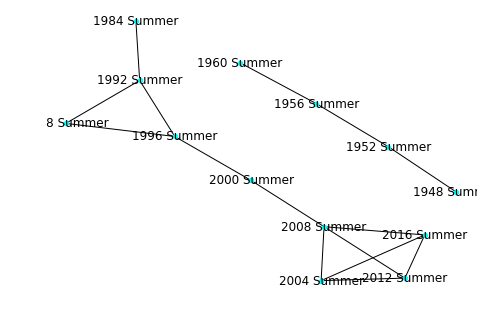

In [37]:
nx.draw_kamada_kawai(P, node_size=20, node_color='cyan', with_labels=True)

C:\Users\user\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


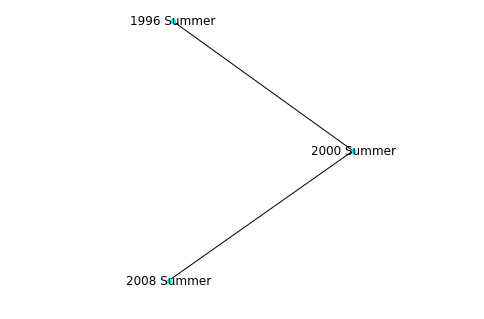

In [38]:
ego = nx.ego_graph(P, sorted_betw[:5][0][0], radius=1)
nx.draw_kamada_kawai(ego, node_size=20, node_color='cyan', with_labels=True)